<a href="https://colab.research.google.com/github/meyounge/MAT422/blob/main/HM3_3_MAT422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3.3

## Unconstrained Problem
$$ \min_{x \in \mathbb{R}^n} f(x) $$

##Necessary and sufficient conditions of local minimizers `

#### 0th-Order Necessary Conditions
If $ x^* $ is a local minimizer of $ f $ and $ f $ is continuous in an open neighborhood of $ x^* $ :
*   $ f(x) \ge f(x^*) $ for all $x$

#### 1st-Order Necessary Conditions
If $ x^* $ is a local minimizer of $ f $ and $ f $ is continuously differentiable in an open neighborhood of $ x^* $, then:
*   $ \nabla f(x^*) = 0 $

#### 2nd-Order Necessary Conditions
If $  x^*  $ is a local minimizer of $ f $ and $ \nabla^2 f $ is continuous in an open neighborhood of $ x^* $, then:
*   $ \nabla^2 f(x^*) $ is concave
*   $  \nabla^2 f(x^*) $ is positive definite.


Find a local minimizer of the following function:
$ f(x, y) = x^2 + y^3 - xy^2 + 7 + 3x $

Newton's Method:
*   $\nabla f(x, y) = <2x - y^2 + 3, 3y^2 - 2xy>$
*   $\nabla^2 f(x, y) = <[2, -2y], [-2y, 6y - 2x]>$
*   $ [x, y] = [x, y] - α \nabla f(x, y)/\nabla^2 f(x, y) $



In [86]:
import numpy as np

# Guess
v = np.array([1., 1.])
a = 0.0005

def f_xy(x, y):
  return x**2 + y**3 - x*y**2 + 7 + 3*x

def I7_f_xy(x, y):
  return np.array([2*x-y**2+3,3*y**2-2*x*y])

def I72_f_xy(x, y):
  return np.array([[2, -2*y], [-2*y, 6*y - 2*x]])

print("Guess: ")
print(v)

tol = 0.001
while not (I7_f_xy(v[0], v[1]) < tol).all():
  v = v - a*np.matmul(np.linalg.inv(I72_f_xy(v[0], v[1])),I7_f_xy(v[0], v[1]))
  #v = v - a*I7_f_xy(v[0], v[1])
  i = i + 1
print()
print("Solution: ")
print(f"X = {v[0]:.3f}, Y = {v[1]:.3f}")
print("f(x, y) = ",f_xy(v[0], v[1]))
print("I7f(x, y) = ",I7_f_xy(v[0], v[1]))

Guess: 
[1. 1.]

Solution: 
X = -1.500, Y = 0.000
f(x, y) =  4.75000026031087
I7f(x, y) =  [0.00099981 0.00024978]


##Convexity and global minimizers

#### 0th-Order Necessary Conditions
If $ x^* $ is a global minimizer of $ f $ and $ f $ is continuous in an open neighborhood of $ x^* $ :
*   $ f(x) \ge f(x^*) $ for all $x$

#### 1st-Order Necessary Conditions
If $ x^* $ is a global minimizer of $ f $ and $ f $ is continuously differentiable in an open neighborhood of $ x^* $, then:
*   $ \nabla f(x^*) = 0 $

#### 2nd-Order Necessary Conditions (concavity)
If $  x^*  $ is a global minimizer of $ f $ and $ \nabla^2 f $ is continuous in an open neighborhood of $ x^* $, then:
*   $  \nabla^2 f(x^*) $ is positive definite.
*   $ \nabla^2 f(x^*) $ is concave

Find a global minimizer of the following function: $ f(x) = 5-x-3x^2+|x^3| $ and graph it to show that it is the global minima

Newton's method:
*   $\nabla f(x, y) = -1 - 6x + 3x^2 $
*   $\nabla^2 f(x, y) = -6 + 6x$
*   $ x = x - α\nabla f(x, y)/\nabla^2 f(x, y) $

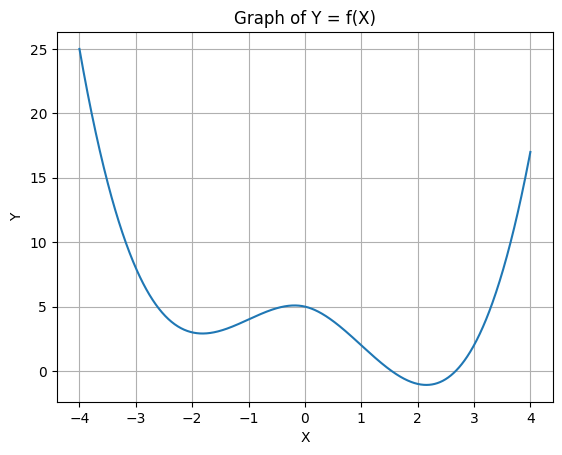


Guess:  1.5
Global Minima
X =  2.1546873535105178
I7f(x) =  -9.134692863099758e-05  =~ 0
I7^2f(x) =  6.928124121063107  > 0

Guess:  -3
Local Minima
X =  -1.816516435829322
I7f(x) =  -9.726993825864838e-05  =~ 0
I7^2f(x) =  4.899098614975932  > 0


In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Guess
x = 1.5
a = 0.1

def f_x(x):
  return 5 - x - 3 * x**2 + np.abs(x**3)

def I7_f_x(x):
  if x > 0:
    return -1 - 6 * x + 3 * x**2
  else:
    return -1 - 6 * x - 3 * x**2


def I72_f_x(x):
  if x > 0:
    return -6 + 6 * x
  else:
    return -6 - 6 * x

X = np.linspace(-4, 4, 1000)
Y = f_x(X)

#Plot the function
plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph of Y = f(X)')
plt.grid(True)
plt.show()
print()
print("Guess: ", x)

#Find the global minima
tol = 0.0001
while np.abs(I7_f_x(x)) > tol:
  x = x - a * I7_f_x(x)/I72_f_x(x)


print("Global Minima")
print("X = ", x)
print("I7f(x) = ", I7_f_x(x), " =~ 0")
print("I7^2f(x) = ", I72_f_x(x), " > 0")

#Find the local minima
x = -3
a = 0.1
print()
print("Guess: ", x)

tol = 0.0001
while np.abs(I7_f_x(x)) > tol:
  x = x - a * I7_f_x(x)/I72_f_x(x)

print("Local Minima")
print("X = ", x)
print("I7f(x) = ", I7_f_x(x), " =~ 0")
print("I7^2f(x) = ", I72_f_x(x), " > 0")



##Gradient descent

###Gradient decents (method of finding minima)
Repeat the following until your loss function meets a set tolerance

*alpha is a hyper paramter*

$ w = w_0 - α * ∇F(w)$

This is what is known as stocastic gradient decents, it is the simplist form of gradient decents

Create a stocastic gradient decents algorthm using the MSE loss function for iris dataset

$$ {MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

In [166]:
# Guess
x = 1.5
a = 0.1

def MSE(w, x, y):
  return np.sum(np.matmul(x, w.T) - y)**2

def I7_MSE(x, w, y):
  return np.matmul(x.T, np.matmul(x, w.T) - y)


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

iris = datasets.load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, train_size=0.8)

w = np.ones(len(X_train[0]))

tol = 0.00001
a = 0.0001
while MSE(x = X_train, y = Y_train, w = w) > tol:
  w = w - a * I7_MSE(x = X_train, y = Y_train, w = w)

print(w)
y_pred = np.matmul(X_test, w.T)
print("R^2 = ", r2_score(Y_test, y_pred))


[-0.28384817  0.24398436  0.26506833  0.75929587]
R^2 =  0.9069248096320065
